# Almog PIV project

Post analysis, see also the analysis*.ipynb

April 23

In [9]:
from pivpy import pivpy, io, graphics
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams["figure.figsize"] = (10, 10)

In [10]:
## Initialize data location

In [11]:
import pathlib
root_path = pathlib.Path('./')
analysis_path = root_path / 'Analysis'
image_path = root_path / 'RawData'


# run_no = 1
# first_file = 400

# run_no = 2
# first_file = 700

run_no = 3
first_file = 1000

num_files = 200
d = 20.0 # mm
U_theo = 21.47 # mm/s see Excel file, we measured during the run 7.1 pixel / frame

# we measured 
mm_scale = 120 # mm
pix_scale = 1613 # pix, see above
dt = 25000e-6 # 25000 us = 25 ms = 0.025 s


netcdf_file = f'../data/april23_run{run_no}.nc'
normalized_netcdf_file = f'../data/april23_run{run_no}_normed.nc'


## Figures

Almog prepared a document on overleaf about the PIV analysis. the link is here
https://www.overleaf.com/project/63f5eeb8f7fb1a583f248b22


1. we normalize everything to the cylinder_scale $d$ and $U_\infty$
2. We plot $V_x(y)$ to see that it is close to 1 and perpendicular to see that the flow is not affected by the walls



In [12]:
from normalize_dataset import normalize_dataset

ds = xr.load_dataset(netcdf_file)
dsn = normalize_dataset(ds, mm_scale, pix_scale, dt, d, U_theo)

dsn.to_netcdf(normalized_netcdf_file)

In [13]:
# Ensemble average map:
ave = dsn.piv.average

(<Figure size 1000x1000 with 2 Axes>,
 <AxesSubplot: xlabel='x ()', ylabel='y ()'>)

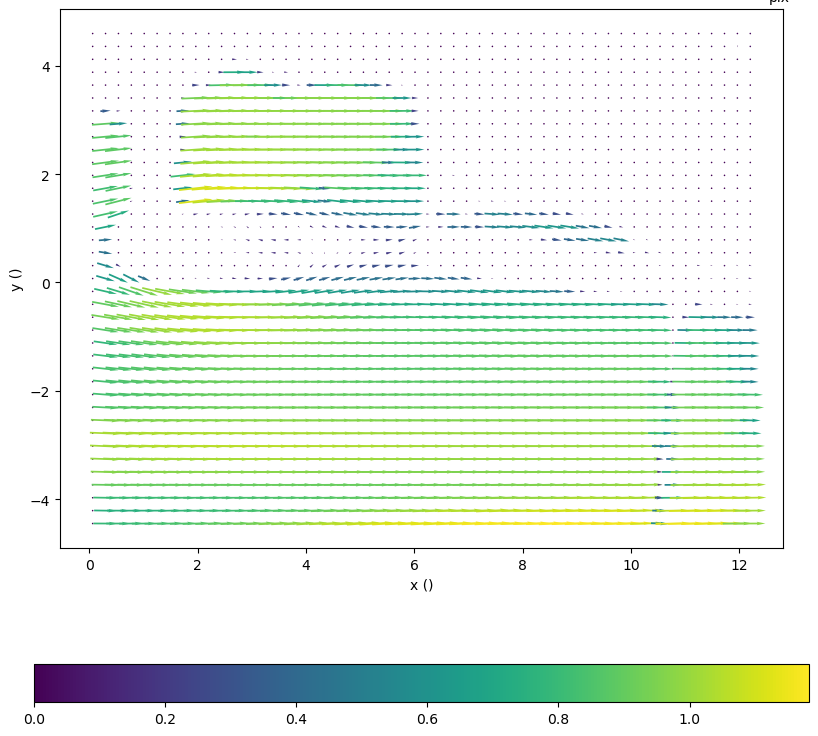

In [14]:
fig = plt.figure()
ave['x'].attrs['units'] = ''
ave['y'].attrs['units'] = ''
ave.piv.quiver(arrScale = 20,colorbar=True, colorbar_orient='horizontal', nthArr = 4, cmap='viridis')
# fig.savefig(f'../results/april23-run{run_no}_piv_map.png')

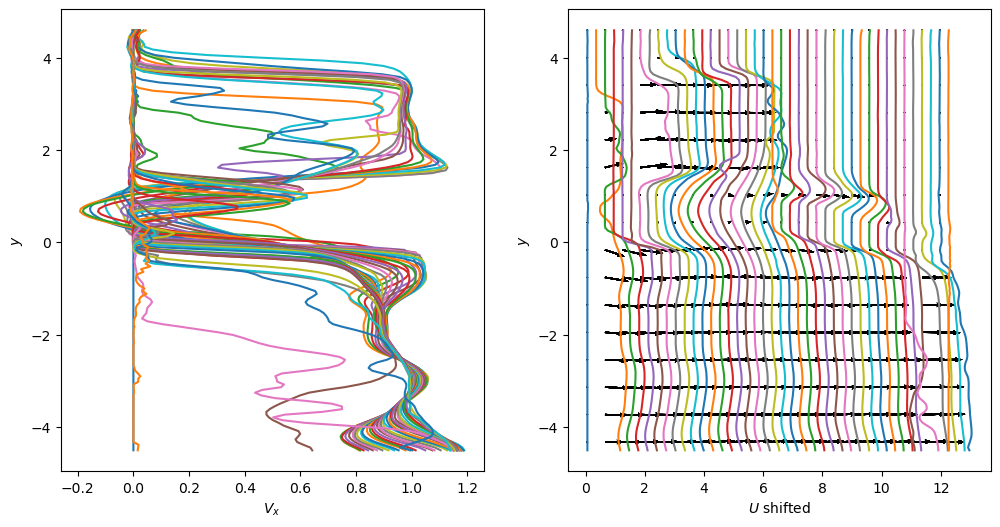

In [15]:
fig,ax = plt.subplots(1,2,figsize=(12,6))

for x in ave.x[::5]:
    tmp = ave.sel(x=x, method='nearest')
    ax[0].plot(tmp.u, tmp.y)
    ax[0].set_xlabel('$V_x$')
    ax[0].set_ylabel('$y$')
    
    ax[1].quiver(ave['x'][::10],ave['y'][::10],ave['u'][::10,::10].T,ave['v'][::10,::10].T)
    ax[1].plot(tmp.u + x, tmp.y)
    ax[1].set_xlabel('$U$ shifted')
    ax[1].set_ylabel('$y$')


# fig.savefig(f'../results/april23-run{run_no}_profiles_Utheo.png')